In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [ ]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv"

df = pd.read_csv(url)
print(df.shape)
df.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## 散布図

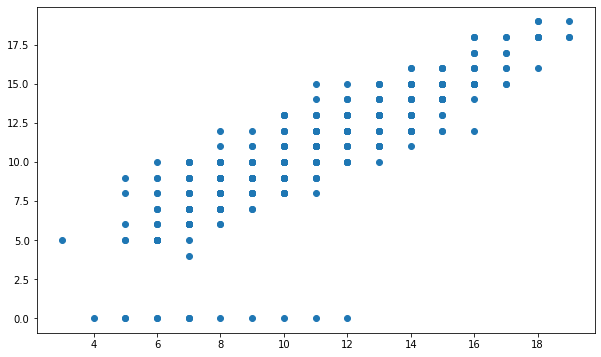

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(
    df["G1"],
    df["G2"]
)

## カテゴリデータ(性別)で散布図を表示

In [ ]:
cmap = plt.get_cmap("tab10")

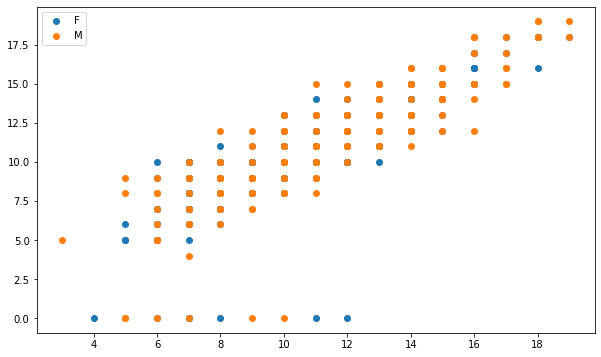

In [ ]:
sex_list = df["sex"].unique()

plt.figure(figsize=(10, 6))

for i in range(len(sex_list)):
    temp_df = df[df["sex"]==sex_list[i]]
    plt.scatter(
        temp_df["G1"],
        temp_df["G2"],
        c = [cmap(i)],
        label=sex_list[i]
    )
    
plt.legend()

## 年代でbin分けして散布図を表示

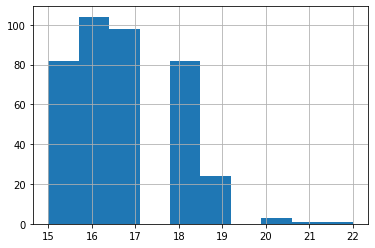

In [ ]:
df["age"].hist()

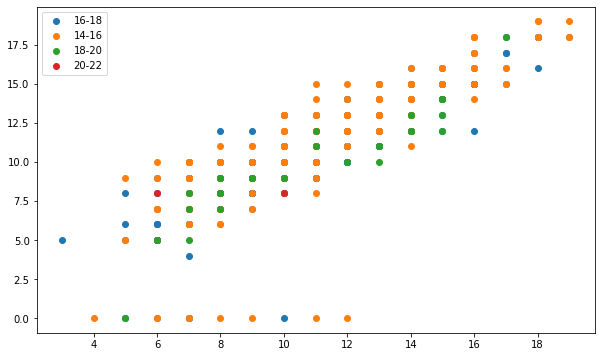

In [ ]:
# 年代をbin分
df["era"] = pd.cut(df["age"], [14, 16, 18, 20, 22],  labels=["14-16", "16-18", "18-20", "20-22"])

era_list = df["era"].unique()

plt.figure(figsize=(10, 6))

for i in range(len(era_list)):
    temp_df = df[df["era"]==era_list[i]]
    plt.scatter(
        temp_df["G1"],
        temp_df["G2"],
        c = [cmap(i)],
        label=era_list[i]
    )
    
plt.legend()

## k-means法によるクラスタリング

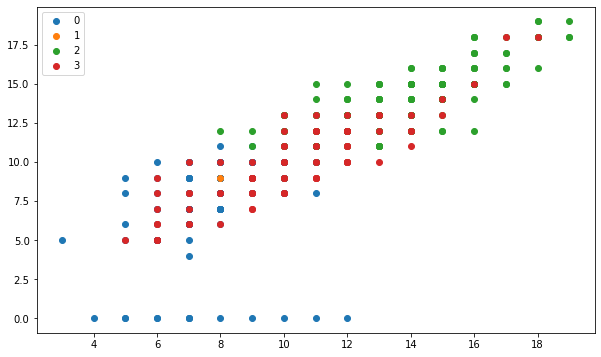

In [ ]:
k = 4

# one-hot-encoding
df_dummy = pd.get_dummies(df)

# k-means法によるクラスタリング
kmeans_model = KMeans(n_clusters=k, random_state=42).fit(df_dummy)
labels = kmeans_model.labels_

df["category"] = labels

label_list = np.unique(labels)

plt.figure(figsize=(10, 6))

for i in range(len(label_list)):
    temp_df = df[df["category"]==label_list[i]]
    plt.scatter(
        temp_df["G1"],
        temp_df["G2"],
        c = [cmap(i)],
        label=label_list[i]
    )
    
plt.legend()

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,era,category
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,16-18,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,16-18,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,14-16,3
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,14-16,2
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,14-16,0


## 3つの分類を統合する

In [ ]:
cmap = pd.DataFrame(matplotlib.colors.CSS4_COLORS.items())[1]

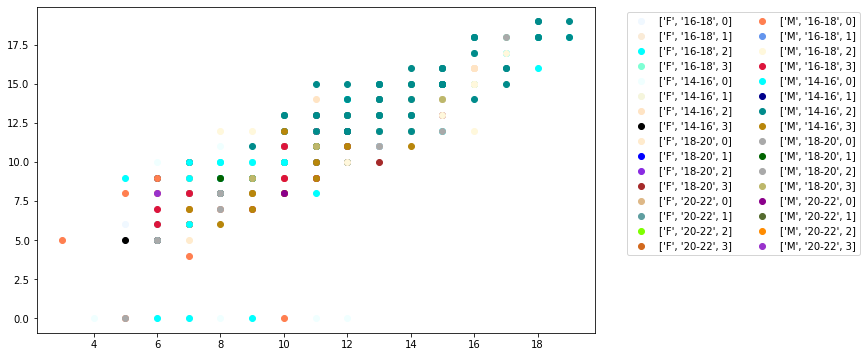

In [ ]:
plt.figure(figsize=(10, 6))

for i in range(len(sex_list)):
    temp_df_1 = df[df["sex"]==sex_list[i]]

    for j in range(len(era_list)):
        temp_df_2 = temp_df_1[temp_df_1["era"]==era_list[j]]

        for k in range(len(label_list)):
            temp_df_3 = temp_df_2[temp_df_2["category"]==label_list[k]]
            
            num = len(label_list) * len(era_list) * i  + len(era_list)*j + k # 色分用の数字

            plt.scatter(
                temp_df_3["G1"],
                temp_df_3["G2"],
                c = cmap[num],
                label=[sex_list[i], era_list[j], label_list[k]]
            )

plt.legend(bbox_to_anchor=(1.05, 1), ncol = 2)